# Lab 출생률 데이터
- 질병 대책 본부(CDC, Centre for Disease Control)에서 제공하고 자유롭게 사용할 수 있는 미국의 출생률 데이터를 살펴보자. 
- 이 데이터는 아래 URL 에서 다운받을 수 있다.
- https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [1]:
# 데이터 다운로드를 위한 쉘 명령어
# !curl -0 https://raw.githubusercontent.com/jakevdp/data-CDCbirths
# master/births.csv
import numpy as np
import pandas as pd

In [2]:
# 데이터의 Pandas 사용
births = pd.read_csv('births.csv')

In [3]:
# 데이터 확인해보기
print(births)

       year  month   day gender  births
0      1969      1   1.0      F    4046
1      1969      1   1.0      M    4440
2      1969      1   2.0      F    4454
3      1969      1   2.0      M    4548
4      1969      1   3.0      F    4548
5      1969      1   3.0      M    4994
6      1969      1   4.0      F    4440
7      1969      1   4.0      M    4520
8      1969      1   5.0      F    4192
9      1969      1   5.0      M    4198
10     1969      1   6.0      F    4710
11     1969      1   6.0      M    4850
12     1969      1   7.0      F    4646
13     1969      1   7.0      M    5092
14     1969      1   8.0      F    4800
15     1969      1   8.0      M    4934
16     1969      1   9.0      F    4592
17     1969      1   9.0      M    4842
18     1969      1  10.0      F    4852
19     1969      1  10.0      M    5190
20     1969      1  11.0      F    4580
21     1969      1  11.0      M    4598
22     1969      1  12.0      F    4126
23     1969      1  12.0      M    4324


In [4]:
# 피벗 테이블을 사용해 이 데이터를 좀 더 잘 이해할 수 있다.
# decade 함수로 년도 열을 추가하고, 년도별 남녀의 출생 수를 살펴보자.
births['decade'] = 10 * (births['year'] // 10)

In [5]:
births_pivot = births.pivot_table('births', index='year', columns='gender', aggfunc='sum')
births_pivot.head()

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023


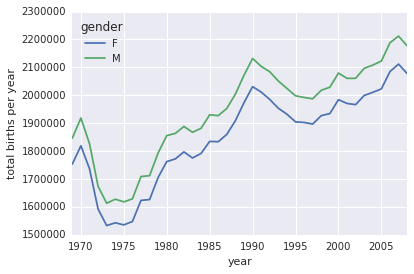

In [6]:
# 위 부분합 데이터로 연도별 항상 남성의 출생률이 여성의 출생률 보다 높았음을 알 수 있다.
# 이 추세를 더욱 분명하게 확인하기 위해 Pandas의 기본 플로팅 도구를 활용해 연도별 출생 수를 시각화한다.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Seaborn 스타일 사용
births_pivot.plot()
plt.ylabel('total births per year')

###### 결과
- 남성 출생률이 항상 여성보다 많아 왔음.
- 2007년 출생률이 가장 높았음.

### 추가 데이터 탐색
- Pandas 도구를 사용해 이 데이터세트에서 뽑아낼 수 있는 몇 가지 흥미로운 특징이 있다.
- 먼저 데이터를 정제해야 한다. (날짜 오타와 누락된 값)으로 인한 이상치를 제거해야 한다.
- 데이터를 한 번에 제거하는 쉬운 방법은 이상치를 제거하는 것으로 시그마 클리핑 연산을 통해 진행한다.

In [7]:
### 이 부분은 이해가 어려울 수 있으니 그냥 실행해 봅니다.
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
# 마지막 줄은 표본 평균의 견고한 추정치로, 0.74는 가우스 분포의 사분위 수에서 비롯한 것이다.
# 이와 함께 query() 메서드를 사용해 이 값에서 벗어난 출생 수를 가진 행을 걸러낼 수 있다.
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [8]:
# 데이터를 확인해본다.
births.tail()

,year,month,day,gender,births,decade
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980
15066,1988,12,31.0,M,4698,1980


In [9]:
# 데이터를 전처리한다.
# 'day' 열을 정수형으로 설정; 원래는 널 값 때문에 문자열이었음.
births['day'] = births['day'].astype(int)

In [10]:
# 마지막으로 날짜, 월, 연도를 겳합해 Date 인덱스를 생성할 수 있다.
# 이렇게 하면 각 행에 대응하는 요일을 빠르게 계산할 수 있다.
# 년(year), 월(month), 일(day)로부터 날짜(datetime) 인덱스 생성
births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month +
                             births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [40]:
# 이 인덱스를 이용해 수십 년 동안의 요일별 출생 수를 그래프로 그릴 수 있다.
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean')

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


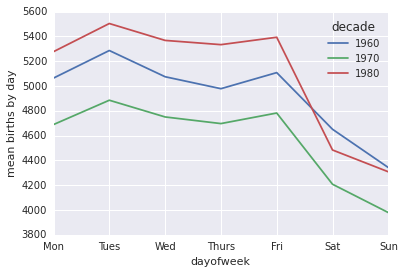

In [12]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
### 수십년 동안의 요일별 출생수를 그래프로 그린다.
# 출생 수가 주중보다 주말에 약간 더 낮은 것을 확인할 수 있다!
# 1990년 대와 2000년 대는 없는데, CDC 데이터가 1989년을 기점으로 태어난 년월만 포함하고 있기 때문이다.

In [13]:
# 또 다른 흥미로운 관점은 연도 내 일별 평균 출생 수를 그래프로 나타내는 것이다.
# 먼저 데이터를 월과 일별로 분류하자.
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
   6   4668.150
   7   4706.925
   8   4629.650
   9   4537.775
   10  4591.700
   11  4675.150
   12  4700.800
   13  4730.050
   14  4816.200
   15  4733.650
   16  4665.025
   17  4654.650
   18  4707.325
   19  4731.525
   20  4767.525
   21  4790.250
   22  4742.800
   23  4666.750
   24  4653.200
   25  4698.000
   26  4715.900
   27  4747.025
   28  4771.800
   29  4702.300
   30  4644.225
...         ...
12 2   4830.300
   3   4758.500
   4   4718.725
   5   4734.675
   6   4683.050
   7   4704.325
   8   4803.800
   9   4793.825
   10  4785.325
   11  4738.500
   12  4791.300
   13  4676.675
   14  4792.100
   15  4920.800
   16  4968.100
   17  4951.600
   18  4936.375
   19  4962.925
   20  4877.025
   21  4816.100
   22  4661.925
   23  4466.675
   24  4126.250
   25  3844.450
   26  4383.525
   27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [14]:
# 결과로 월과 일을 인덱스로 가지는 다중 인덱스를 얻게 된다.
# 그래프로 쉽게 표현하기 위해 이 월과 일을 더미 연도 변수와 결합해 연월일의 날짜로 변환해 보자. 2012년만 본다.
# 2월 29일을 올바르게 처리하도록 윤년을 선택해야 한다. 
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

In [15]:
# 데이터 확인
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


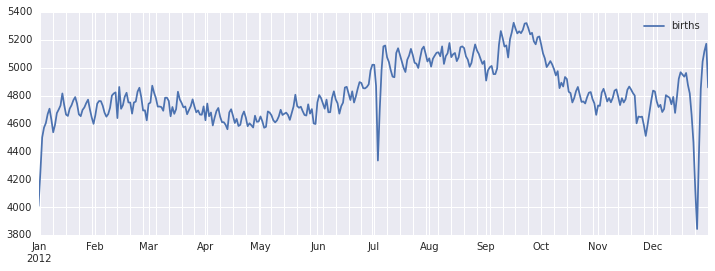

In [16]:
#월과 일에만 초점을 맞춰 이제 해당 연도의 날짜별 평균 출생 수를 나타내는 시계열 데이터가 만들어졌다.
# 이로부터 데이터를 플로팅하기 위해 plot 메서드를 사용할 수 있다.
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

## <결론>
#### 특히 이 그래프에서 확인할 수 있는 놀라운 점은 미국의 휴일(예: 독립 기념일(7/4), 노동절(9월 첫째주 월요일), 추수감사절(11월 넷째주 목요일), 크리스마스(12/25), 새해(1/1)에는 출생률이 급감했다는 것이다.
#### 이 현상은 자연 분만에 대한 깊은 정신적, 신체적 효과라기 보다는 예정 분만 및 유도 분만을 선호했던 경향이 반영된 것으로 보인다.

# Chart

## 1. matplotlib
- matplotlib.pyplot 모듈을 사용한다.
- pyplot은 시각화를 단계별로 간편하게 만들 수 있는 구조로 되어 있다.
- 시각화가 완성되면 savefig()을 통해 그래프를 저장하거나 show()를 사용하여 화면에 띄울 수 있다.

In [57]:
# matplotlib에서 pyplot 모듈을 약어로 "plt"를 사용하여 import 한다.
from matplotlib import pyplot as plt
from collections import defaultdict, Counter

In [61]:
# 10년 단위별 GDP 정보를 입력한다.
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

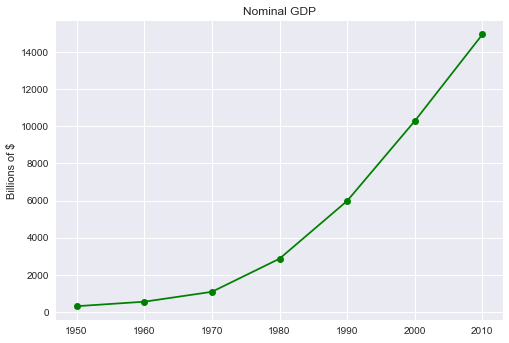

In [65]:
# x축에 연도, y축에 GDP가 있는 선 그래프를 만들자
plt.plot(years, gdp, color="green", marker='o', linestyle='solid')
plt.ylabel('Billions of $')
plt.title("Nominal GDP")
plt.show()

## 2. Bar chart
- 막대 그래프는 이산적인 항목들에 대한 변화를 보여줄 때 사용하면 좋다.
- 여러 영화가 아카데미 시상식에서 상을 각각 몇 개 받았는지 확인해 보자.

In [66]:
# movies에는 영화제목을, num_oscars에는 수상횟수를 저장한다.
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

In [67]:
# 막대가 가운데로 올 수 있도록 왼쪽 좌표에 0.5씩 더해 주자.
xs = [i + 0.5 for i, _ in enumerate(movies)]

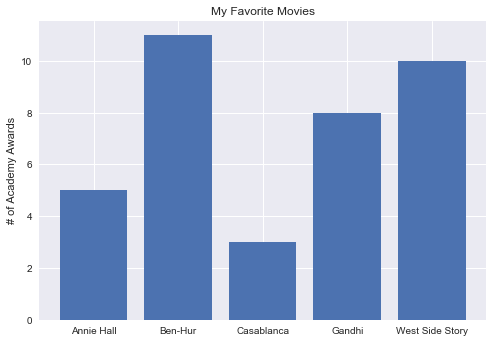

In [69]:
# 왼편으로부터 x축의 위치가 xs이고 높이가 num_oscars인 막대를 그리자.
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

In [52]:
# 막대의 가운데에 오도록 영화 제목 레이블을 달자.


## 3. Scatterplots
- 산점도는 두 변수 간의 연관 관계를 보여 주고 싶을 때 적합한 형태의 그래프이다.
- 예를 들어, 각 사용자의 친구 수와 그들이 매일 사이트에 체류하는 시간 사이의 연관성을 보여준다.

In [76]:
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

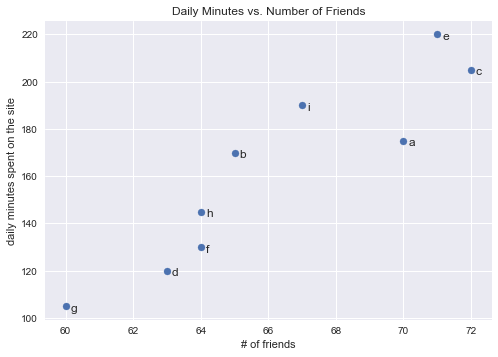

In [79]:
# 각 포인트에 레이블을 달자.
plt.scatter(friends, minutes)
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label, 
                xy = (friend_count, minute_count), # label을 데이터 포인트 근처에 두되
                xytext=(5, -5), # 약간 떨어져 있게 하자.
                textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()